Dans un notebook précédent, on a vu comment créer une grille hexagonale et comment l'animer.

On va maintenant utiliser MoviePy pour animer ces plots.

<!-- TEASER_END -->

In [1]:
import moviepy.editor as mpy

In [2]:
from elasticite import EdgeGrid
e = EdgeGrid()

Cette librairie permet de faire des animations depuis diverses librairies de visualisation, comme:

In [3]:
import os
name = 'sinc_vispy'
fps = 25
fname = os.path.join('../files/', name + '.mp4')
if not os.path.isfile(fname):
    from moviepy.editor import VideoClip
    import numpy as np
    from vispy import app, scene
    app.use_app('pyglet')
    from vispy.gloo.util import _screenshot

    canvas = scene.SceneCanvas(keys='interactive')
    view = canvas.central_widget.add_view()
    xx, yy = np.arange(-1,1,.02),np.arange(-1,1,.02)
    X,Y = np.meshgrid(xx,yy)
    R = np.sqrt(X**2+Y**2)
    Z = lambda t : 0.1*np.sin(10*R-2*np.pi*t)
    surface = scene.visuals.SurfacePlot(x= xx-0.1, y=yy+0.2, z= Z(0),
                            shading='smooth', color=(0.5, 0.5, 1, 1))
    view.add(surface)

    # Use a 3D camera
    # Manual bounds; Mesh visual does not provide bounds yet
    # Note how you can set bounds before assigning the camera to the viewbox
    cam = scene.TurntableCamera(elevation=30, azimuth=30, up='z', distance=2)
    view.camera = cam

    canvas.show()

    # ANIMATE WITH MOVIEPY
    def make_frame(t):
        surface.set_data(z = Z(t)) # Update the mathematical surface
        canvas.on_draw(None) # Update the image on Vispy's canvas
        return _screenshot((0,0,canvas.size[0],canvas.size[1]))[:,:,:3]

    animation = VideoClip(make_frame, duration=1).resize(width=350)
    animation.write_videofile(fname, fps=fps)
mpy.ipython_display(fname)

Mais ce qui nous intéresse c'est de convertir nos trames construites avec matplotlib:

[MoviePy] >>>> Building video ../files/sinc_mpl.mp4
[MoviePy] Writing video ../files/sinc_mpl.mp4


 98%|█████████▊| 50/51 [00:01<00:00, 31.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../files/sinc_mpl.mp4 



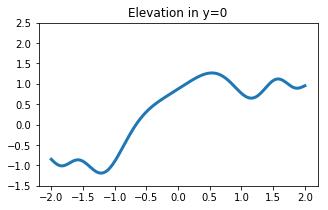

In [4]:
name = 'sinc_mpl' 
fname = os.path.join('../files/', name + '.mp4')
if not os.path.isfile(fname):
    import matplotlib.pyplot as plt
    import numpy as np
    from moviepy.video.io.bindings import mplfig_to_npimage
    import moviepy.editor as mpy

    # DRAW A FIGURE WITH MATPLOTLIB
    duration = 2.

    fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
    xx = np.linspace(-2,2,200) # the x vector
    zz = lambda d: np.sinc(xx**2)+np.sin(xx+d) # the (changing) z vector
    ax.set_title("Elevation in y=0")
    ax.set_ylim(-1.5,2.5)
    line, = ax.plot(xx, zz(0), lw=3)

    # ANIMATE WITH MOVIEPY (UPDATE THE CURVE FOR EACH t). MAKE A GIF.

    def make_frame_mpl(t):
        line.set_ydata( zz(2*np.pi*t/duration))  # <= Update the curve
        return mplfig_to_npimage(fig_mpl) # RGB image of the figure

    animation = mpy.VideoClip(make_frame_mpl, duration=duration)
    animation.write_videofile(fname, fps=fps)
mpy.ipython_display(fname)

[MoviePy] >>>> Building video ../files/circle.mp4
[MoviePy] Writing video ../files/circle.mp4


 99%|█████████▊| 75/76 [00:05<00:00, 12.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../files/circle.mp4 



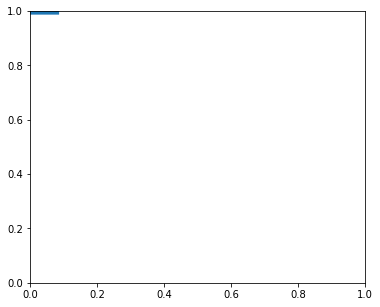

In [5]:
name = 'circle'
fname = os.path.join('../files/', name + '.mp4')
if not os.path.isfile(fname):
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import numpy as np
    from moviepy.video.io.bindings import mplfig_to_npimage
    import moviepy.editor as mpy
    duration = 3.
    fig_mpl, ax = plt.subplots(1, figsize=(6, 5), facecolor='white')

    def draw_elementary_pattern(ax, center):
        ax.add_artist(mpl.patches.Wedge(center, 1., 0, 180, width=.1))

    def make_frame_mpl(t):
        ax.cla()
        draw_elementary_pattern(ax, t/duration)
        return mplfig_to_npimage(fig_mpl) # RGB image of the figure

    animation = mpy.VideoClip(make_frame_mpl, duration=duration)
    animation.write_videofile(fname, fps=fps)
mpy.ipython_display(fname)

Pour le plaisir, une autre animation

[MoviePy] >>>> Building video ../files/svm.mp4
[MoviePy] Writing video ../files/svm.mp4


 99%|█████████▉| 175/176 [00:52<00:00,  3.85it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: ../files/svm.mp4 



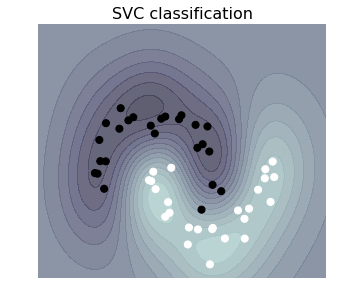

In [6]:
name = 'svm'
fname = os.path.join('../files/', name + '.mp4')
if not os.path.isfile(fname):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import svm # sklearn = scikit-learn
    from sklearn.datasets import make_moons
    from moviepy.editor import VideoClip
    from moviepy.video.io.bindings import mplfig_to_npimage

    X, Y = make_moons(50, noise=0.1, random_state=2) # semi-random data

    fig, ax = plt.subplots(1, figsize=(4, 4), facecolor=(1,1,1))
    fig.subplots_adjust(left=0, right=1, bottom=0)
    xx, yy = np.meshgrid(np.linspace(-2,3,500), np.linspace(-1,2,500))

    def make_frame(t):
        ax.clear()
        ax.axis('off')
        ax.set_title("SVC classification", fontsize=16)

        classifier = svm.SVC(gamma=2, C=1)
        # the varying weights make the points appear one after the other
        weights = np.minimum(1, np.maximum(0, t**2+10-np.arange(50)))
        classifier.fit(X, Y, sample_weight=weights)
        Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.8,
                    vmin=-2.5, vmax=2.5, levels=np.linspace(-2,2,20))
        ax.scatter(X[:,0], X[:,1], c=Y, s=50*weights, cmap=plt.cm.bone)

        return mplfig_to_npimage(fig)

    animation = VideoClip(make_frame, duration = 7)
    animation.write_videofile(fname, fps=fps)
mpy.ipython_display(fname)

Pour notre cas, on veut animer nos grilles et on simplifie la syntaxte redondante:

In [7]:
name = 'test_grid'
import numpy as np
from elasticite import EdgeGrid

e = EdgeGrid()
def make_lames(e):
    return e.t*np.pi/duration

duration = 3.
e.make_anim(name, make_lames, duration=duration)
fname = os.path.join('../files/', name + '.mp4')
mpy.ipython_display(fname)

AttributeError: 'EdgeGrid' object has no attribute 'make_anim'

In [ ]:
name = 'test_grid2'
import numpy as np
from elasticite import EdgeGrid

e = EdgeGrid()

def make_lames(e):
    return e.lames[0, :] * np.pi +  e.t*np.pi/duration

duration = 3.
e.make_anim(name, make_lames, duration=duration)
fname = os.path.join('../files/', name + '.mp4')
mpy.ipython_display(fname)